In [1]:
#In this Lab you will load a customer dataset, fit the data, and use K-Nearest Neighbors to predict a data point.
#But what is K-Nearest Neighbors?

#K-Nearest Neighbors is an algorithm for supervised learning. 
#Where the data is 'trained' with data points corresponding to their classification. 
#Once a point is to be predicted, it takes into account the 'K' nearest points to it to determine it's classification.

#n this case, we have data points of Class A and B. We want to predict what the star (test data point) is. 
#If we consider a k value of 3 (3 nearest data points) we will obtain a prediction of Class B. 
#Yet if we consider a k value of 6, we will obtain a prediction of Class A.

#In this sense, it is important to consider the value of k. 
#But hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. 
#It considers the 'K' Nearest Neighbors (points) when it predicts the classification of the test point.

In [3]:
#Importing packages
import itertools
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import pandas as pd
from sklearn import preprocessing
%matplotlib inline

In [3]:
#Downloading data
#Downloading the data
import wget
url='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/teleCust1000t.csv'
wget.download(url, 'C:/Users/Maikol Cerda/Desktop/Python_exercise/12.- IBM machine learning with python/Videos/teleCust1000t.csv')

100% [..............................................................................] 37048 / 37048

'C:/Users/Maikol Cerda/Desktop/Python_exercise/12.- IBM machine learning with python/Videos/teleCust1000t.csv'

In [4]:
#Loading data
#reading the data
df = pd.read_csv('C:/Users/Maikol Cerda/Dropbox/2.-DATA SCIENCE COURSES/0.- COURSERA/1.- IBM machine learning with python/Videos/teleCust1000t.csv')

# take a look at the dataset
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [5]:
#About the dataset
#Imagine a telecommunications provider has segmented its customer base by service usage patterns, 
#categorizing the customers into four groups. 
#If demographic data can be used to predict group membership, 
#the company can customize offers for individual prospective customers. 

#It is a classification problem. That is, given the dataset, with predefined labels, 
#we need to build a model to be used to predict class of a new or unknown case.

#The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

#The target field, called custcat, has four possible values that correspond to the four customer groups, as follows:
#1- Basic Service 2- E-Service 3- Plus Service 4- Total Service

#Our objective is to build a classifier, to predict the class of unknown cases. 
#We will use a specific type of classification called K nearest neighbour.

In [5]:
#How many of each class are in the data
df['custcat'].value_counts()
#281 Plus Service, 266 Basic-service, 236 Total Service, and 217 E-Service customers

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C97779470>]],
      dtype=object)

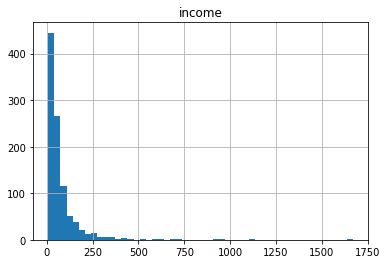

In [6]:
#Data viasualization
#Income analysis
df.hist(column='income', bins=50)

In [8]:
#Let define feature sets, X
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']].values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
#What are our labels?
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

In [9]:
#Normalize data

#Data Standardization give data zero mean and unit variance, it is good practice, 
#especially for algorithms such as KNN which is based on distance of cases:
X= preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

In [10]:
#TRAIN-TEST SPLIT
#Out of Sample Accuracy is the percentage of correct predictions that the model makes 
#on data that that the model has NOT been trained on. 

#Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, 
#due to the likelihood of being over-fit.

#It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, 
#is to make correct predictions on unknown data. 

#So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split. 
#Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. 
#After which, you train with the training set and test with the testing set.

#This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the 
#dataset that have been used to train the data. It is more realistic for real world problems.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.2, random_state=4)
print('Train set: ', X_train.shape, y_train.shape)
print('Test set: ', X_test.shape, y_test.shape)


Train set:  (800, 11) (800,)
Test set:  (200, 11) (200,)


In [11]:
#CLASSIFICATION
#Import library
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Training
#Lets start the algorithm with k=4 for now:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [14]:
#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

In [16]:
#ACCURACY EVALUATION
#In multilabel classification, accuracy classification score is a function that computes subset accuracy. 
#This function is equal to the jaccard_similarity_score function. 
#Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

from sklearn import metrics
print('Train Set Accuracy: ', metrics.accuracy_score(y_train, neigh.predict(X_train)))
print('Test Set Accuracy: ', metrics.accuracy_score(y_test, yhat))

Train Set Accuracy:  0.5475
Test Set Accuracy:  0.32


In [18]:
#WHAT ABOUT OTHER Ks
#K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. 
#So, how can we choose right value for K? 
#The general solution is to reserve a part of your data for testing the accuracy of the model. 
#Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples 
#in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

#We can calculate the accuracy of KNN for different Ks.

Ks=10
mean_acc= np.zeros((Ks-1))
std_acc=np.zeros((Ks-1))
ConfusionMx=[];

for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]= metrics.accuracy_score(y_test, yhat)
    std_acc[n-1]-np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc


array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

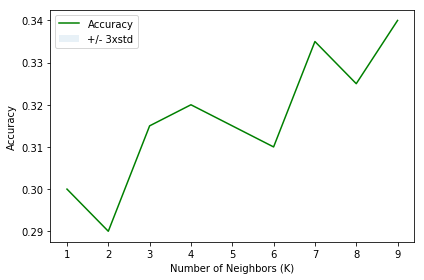

In [22]:
#Plot model accuracy for different values of Kneighbors
plt.plot(range(1,Ks), mean_acc, 'g')
plt.fill_between(range(1,Ks), mean_acc-1*std_acc, mean_acc+1*std_acc, alpha=0.10)
plt.legend(('Accuracy', '+/- 3xstd'))
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [19]:
#Best estimated k
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.34 with k= 9
